<a href="https://colab.research.google.com/github/yleessam/tf/blob/main/cifar10_tensorflow_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. CIFAR10 분류


##1.1 import : 필요한 파이썬 라이브러리

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
import cv2
from google.colab.patches import cv2_imshow
from sklearn.metrics import classification_report

##1.2 CIFAR10 데이터 셋 가져오기

* 캐나다 토론토 대학교에서 제작한 데이터셋    
* 제프리 힌턴에 데이터셋 제작에 참여
* 구성 : 32 x 32 x 3의 컬러이미지 데이터 - 총 60000개의 이미지
  - 50000개의 트레이닝용 이미지
  - 10000개의 검증용 이미지
  - 10개의 데이터 종류별로 6000개의 이미지



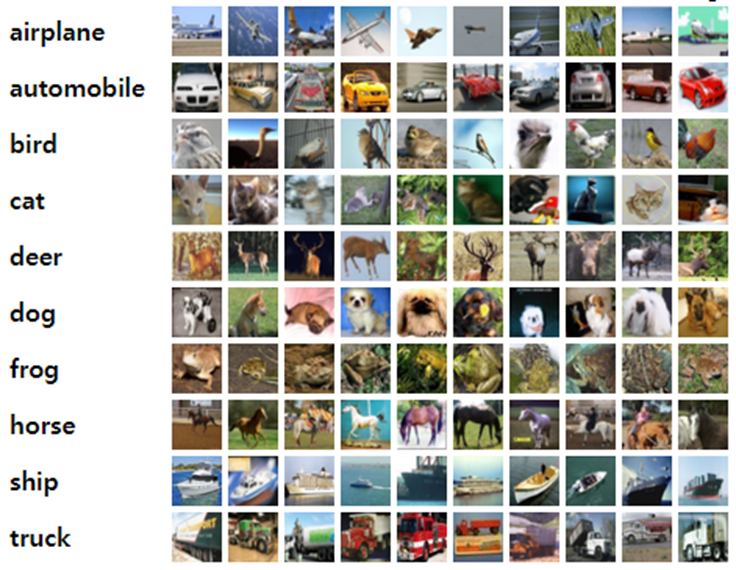

In [14]:
# CIFAR10 데이터를 학습용, 테스트 데이터로 구분하여 읽어옴
((trainX, trainY), (testX, testY)) = cifar10.load_data()

In [15]:
print('X_train.shape =', trainX.shape, 'y_train.shape =', trainY.shape)
print('X_test.shape  =', testX.shape, 'y_test.shape  =', testY.shape)

X_train.shape = (50000, 32, 32, 3) y_train.shape = (50000, 1)
X_test.shape  = (10000, 32, 32, 3) y_test.shape  = (10000, 1)


In [16]:
# 첫 번째 이미지
num = trainX[0]
for i in range(32):  # 이미지의 높이를 위한 반복문
    for j in range(32):  # 이미지의 너비를 위한 반복문
        # RGB 채널 값을 출력합니다. 각 채널 값은 공백으로 구분됩니다.
        print(f'({num[i][j][0]:3d}, {num[i][j][1]:3d}, {num[i][j][2]:3d}) ', end='')
    print()  # 한 행이 끝날 때마다 새로운 줄로 이동합니다.


( 59,  62,  63) ( 43,  46,  45) ( 50,  48,  43) ( 68,  54,  42) ( 98,  73,  52) (119,  91,  63) (139, 107,  75) (145, 110,  80) (149, 117,  89) (149, 120,  93) (131, 103,  77) (125,  99,  76) (142, 115,  91) (144, 112,  86) (137, 105,  79) (129,  97,  71) (137, 106,  79) (134, 106,  76) (124,  97,  64) (139, 113,  78) (139, 112,  75) (133, 105,  69) (136, 105,  74) (139, 108,  77) (152, 120,  89) (163, 131, 100) (168, 136, 108) (159, 129, 102) (158, 130, 104) (158, 132, 108) (152, 125, 102) (148, 124, 103) 
( 16,  20,  20) (  0,   0,   0) ( 18,   8,   0) ( 51,  27,   8) ( 88,  51,  21) (120,  82,  43) (128,  89,  45) (127,  86,  44) (126,  87,  50) (116,  79,  44) (106,  70,  37) (101,  67,  35) (105,  70,  36) (113,  74,  35) (109,  70,  33) (112,  72,  37) (119,  79,  44) (109,  71,  33) (105,  69,  27) (125,  89,  46) (127,  92,  46) (122,  85,  39) (131,  89,  47) (124,  82,  41) (121,  79,  37) (131,  89,  48) (132,  91,  53) (133,  94,  58) (133,  96,  60) (123,  88,  55) (119,  

##1-3. 다운로딩한 데이터 이미지 확인

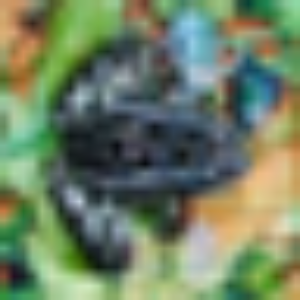

[6]


In [4]:
img = cv2.resize(trainX[200], (300, 300))
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(trainY[200])


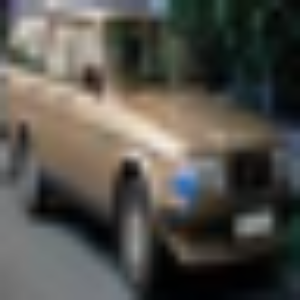

[1]


In [5]:
img2 = cv2.resize(trainX[201], (300, 300))
cv2_imshow(img2)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(trainY[201])

## 1-4. 데이터 전처리

### (1) 이미지 노말라이징

각 이미지의 픽셀 값을 0에서 255 사이의 정수에서 0.0에서 1.0 사이의 실수로 변환

In [17]:
# 정규화된 trainX의 첫 번째 이미지
first_image = trainX[0]

# 첫 번째 이미지의 첫 번째 행을 출력
for j in range(32):  # 이미지 너비에 해당하는 반복문
    # RGB 채널 값 출력, 각 채널 값은 공백으로 구분
    print(f'({first_image[0][j][0]:.2f}, {first_image[0][j][1]:.2f}, {first_image[0][j][2]:.2f}) ', end='')
print()  # 한 행의 출력이 끝나면 새로운 줄로 이동


(59.00, 62.00, 63.00) (43.00, 46.00, 45.00) (50.00, 48.00, 43.00) (68.00, 54.00, 42.00) (98.00, 73.00, 52.00) (119.00, 91.00, 63.00) (139.00, 107.00, 75.00) (145.00, 110.00, 80.00) (149.00, 117.00, 89.00) (149.00, 120.00, 93.00) (131.00, 103.00, 77.00) (125.00, 99.00, 76.00) (142.00, 115.00, 91.00) (144.00, 112.00, 86.00) (137.00, 105.00, 79.00) (129.00, 97.00, 71.00) (137.00, 106.00, 79.00) (134.00, 106.00, 76.00) (124.00, 97.00, 64.00) (139.00, 113.00, 78.00) (139.00, 112.00, 75.00) (133.00, 105.00, 69.00) (136.00, 105.00, 74.00) (139.00, 108.00, 77.00) (152.00, 120.00, 89.00) (163.00, 131.00, 100.00) (168.00, 136.00, 108.00) (159.00, 129.00, 102.00) (158.00, 130.00, 104.00) (158.00, 132.00, 108.00) (152.00, 125.00, 102.00) (148.00, 124.00, 103.00) 


In [18]:
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

In [19]:
# 정규화된 trainX의 첫 번째 이미지
first_image = trainX[0]

# 첫 번째 이미지의 첫 번째 행을 출력
for j in range(32):  # 이미지 너비에 해당하는 반복문
    # RGB 채널 값 출력, 각 채널 값은 공백으로 구분
    print(f'({first_image[0][j][0]:.2f}, {first_image[0][j][1]:.2f}, {first_image[0][j][2]:.2f}) ', end='')
print()  # 한 행의 출력이 끝나면 새로운 줄로 이동


(0.23, 0.24, 0.25) (0.17, 0.18, 0.18) (0.20, 0.19, 0.17) (0.27, 0.21, 0.16) (0.38, 0.29, 0.20) (0.47, 0.36, 0.25) (0.55, 0.42, 0.29) (0.57, 0.43, 0.31) (0.58, 0.46, 0.35) (0.58, 0.47, 0.36) (0.51, 0.40, 0.30) (0.49, 0.39, 0.30) (0.56, 0.45, 0.36) (0.56, 0.44, 0.34) (0.54, 0.41, 0.31) (0.51, 0.38, 0.28) (0.54, 0.42, 0.31) (0.53, 0.42, 0.30) (0.49, 0.38, 0.25) (0.55, 0.44, 0.31) (0.55, 0.44, 0.29) (0.52, 0.41, 0.27) (0.53, 0.41, 0.29) (0.55, 0.42, 0.30) (0.60, 0.47, 0.35) (0.64, 0.51, 0.39) (0.66, 0.53, 0.42) (0.62, 0.51, 0.40) (0.62, 0.51, 0.41) (0.62, 0.52, 0.42) (0.60, 0.49, 0.40) (0.58, 0.49, 0.40) 


### (2) 이미지 flattening

> 1차원 벡터로 변환   
> 데이터셋의 이미지들을 3072 길이의 1차원 벡터로 변환



In [6]:
# Flattening: per a image 32*32*3 -> 1 * 3072
trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))

### (3) LabelBinarizer 클래스

레이블을 이진 클래스 매트릭스로 변환.


In [7]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

##1-5. 심층 신경망 모델 만들기

###(1) 모델 구성

>  다층퍼셉트론인 신경망 모델을 만든다.   
>  계층을 쌓는다

In [8]:
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()


###(2) 학습과정 설정

In [9]:
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

###(3) 모델 학습

In [10]:
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=100, batch_size=32)

Epoch 1/100
1563/1563 [==============================] - 13s 7ms/step - loss: 1.8367 - accuracy: 0.3424 - val_loss: 1.7076 - val_accuracy: 0.3927
Epoch 2/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6522 - accuracy: 0.4174 - val_loss: 1.6040 - val_accuracy: 0.4292
Epoch 3/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5723 - accuracy: 0.4431 - val_loss: 1.5989 - val_accuracy: 0.4272
Epoch 4/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5136 - accuracy: 0.4655 - val_loss: 1.5207 - val_accuracy: 0.4641
Epoch 5/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4630 - accuracy: 0.4842 - val_loss: 1.4935 - val_accuracy: 0.4640
Epoch 6/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4233 - accuracy: 0.4977 - val_loss: 1.4438 - val_accuracy: 0.4848
Epoch 7/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3873 - accuracy: 0.5091 - val_loss: 1.4459 - val_a

###(4) 학습 결과 확인

In [14]:
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
print("[INFO] evaluating network...")

predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), 	predictions.argmax(axis=1), target_names=labelNames))


[INFO] evaluating network...
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

    airplane       0.65      0.66      0.66      1000
  automobile       0.68      0.68      0.68      1000
        bird       0.45      0.48      0.46      1000
         cat       0.39      0.41      0.40      1000
        deer       0.52      0.48      0.50      1000
         dog       0.48      0.46      0.47      1000
        frog       0.62      0.61      0.62      1000
       horse       0.64      0.61      0.63      1000
        ship       0.69      0.71      0.70      1000
       truck       0.62      0.62      0.62      1000

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.57     10000
weighted avg       0.57      0.57      0.57     10000



###(5) 학습결과 시각화

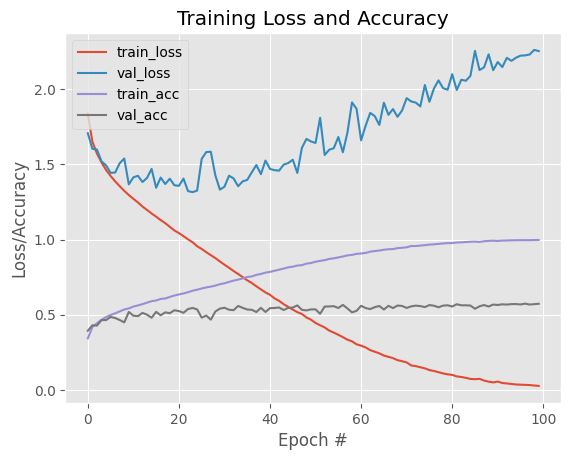

In [15]:
import matplotlib.pyplot as plt
import numpy as np
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("plot.png")

##1-6. 성능개선 시도